    Подключение всякой хрени:

In [27]:
import matplotlib.pyplot as plt
import numpy as np #не уверен, понадобится ли
import math

    Считывание данных:

In [ ]:
#количество оборотов
N = list (map (int, input().split()))
N = [[N[j+i*5] for j in range (5)] for i in range (5)]

In [8]:
#время оборотов (с)
t = list (map (int, input().split()))
t = [[t[j+i*5] for j in range (5)] for i in range (5)]

364 286 274 289 331 265 189 227 231 270 235 189 332 282 245 296 243 241 245 291 293 294 294 295 292


In [17]:
#масса грузов (г)
m = list (map (int, input().split()))

336	269	215	174	138


     Проверка ввода:

In [14]:
for i in range (5):
    print (*N[i], sep = '\t')

12	9	9	9	10
7	5	6	6	7
5	4	7	6	5
5	4	4	4	5
4	4	4	4	4


In [15]:
for i in range (5):
    print (*t[i], sep = '\t')

364	286	274	289	331
265	189	227	231	270
235	189	332	282	245
296	243	241	245	291
293	294	294	295	292


In [18]:
print (*m)

336 269 215 174 138


    Моментики:

In [20]:
l = 0.12
g = 9.81
M = [m[i] * l * g / 1000 for i in range (5)]

#проверОчка
print (*M, sep = '\t')

0.39553920000000004	0.3166668	0.253098	0.20483279999999998	0.1624536


    Пора и средние взять:

In [13]:
N_mid = [sum(N[i]) / 5 for i in range(5)]
t_mid = [sum(t[i]) / 5 for i in range(5)]

#Вот они, больше нигде не нужные:
print (*N_mid, sep = '\t')
print (*t_mid, sep = '\t')

9.8	6.2	5.4	4.4	4.0
308.8	236.4	256.6	263.2	293.6


    Скорости и периоды:

In [44]:
Omega = [2 * math.pi * sum (N[i]) / sum (t[i]) for i in range (5)]
T = [sum (t[i]) / sum (N[i]) for i in range (5)]

#проверОчка
print (*Omega, sep = '\t')
print (*T, sep = '\t')

0.19940160625116563	0.1647874319141854	0.1322260353030778	0.10503805224768305	0.08560197966184722
31.510204081632654	38.12903225806452	47.51851851851852	59.81818181818182	73.4


    Очевидно, что зависимость линейная. Можно и отсортить:

In [25]:
Omega.sort()
M.sort()

#проверОчка
print (*Omega, sep = '\t')
print (*M, sep = '\t')

0.08560197966184722	0.10503805224768305	0.1322260353030778	0.1647874319141854	0.19940160625116563
0.1624536	0.20483279999999998	0.253098	0.3166668	0.39553920000000004


    Погнали погрешности (я решил по-шизоидному их вычислить, а что ещё делать в 3:33?):

In [35]:
sigma_T = [math.sqrt (sum ((T[i] - t[i][j] / N[i][j]) ** 2 for j in range (5)) / 5) for i in range (5)]

print (*sigma_T, sep = '\t')

1.0469961189483963	0.34726229017921617	0.750027061090888	1.1050354319138918	0.25495097567963926


In [36]:
sigma_Omega = [Omega[i] * sigma_t[i] / T[i] for i in range (5)]

print (*sigma_Omega, sep = '\t')

0.5052360921720923	0.15403451061739154	0.1347145047602931	0.06891582010757728	0.01776669334428594


    Какие-то чиселки из из тетрадки для чего-то:

In [38]:
T0 = list (map (float, input().split()))
Tc = list (map (float, input().split()))

3.519 3.407 3.441 3.45 3.482
4.277 4.311 4.289


In [39]:
T0_mid = sum(T0) / 5
Tc_mid = sum(Tc) / 3

print (T0_mid, Tc_mid)

3.4598 4.292333333333334


In [41]:
sigma_T0 = math.sqrt (sum ((T0_mid - T0[i]) ** 2 for i in range (5)) / 5)
sigma_Tc = math.sqrt (sum ((Tc_mid - Tc[i]) ** 2 for i in range (3)) / 3)

print (sigma_T0, sigma_Tc)

0.03803892742967399 0.014079141387961867


    Момент сил трения (внимательнее, вдруг отсортированно):

In [45]:
const = 2 * math.pi * 398 * 8 * (10 ** (-4))
Mtr = [const * Omega[i] for i in range (5)]

print (*Mtr, sep = '\t')

0.3989161140519061	0.3296681667699235	0.26452693722614185	0.2101355772302454	0.17125242731917448


    Время графиков:

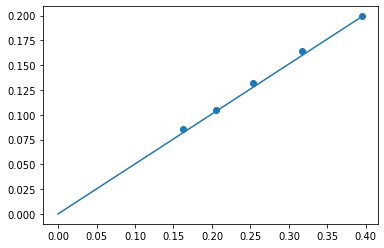

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter (M, Omega);
#Я настолько ленивый, что строю по (0,0) и последней точке:

x = [0] + [M[-1]]
y = [0] + [Omega[-1]]

ax.plot (x,y);